Make Figure 5.

In [1]:
import xarray as xr
import vcm
import matplotlib.pyplot as plt
import fsspec
import cftime
import yaml
plt.rcParams['figure.dpi'] = 150
xr.set_options(keep_attrs=True)

In [2]:
with open('run_urls.yaml') as f:
    runs = yaml.safe_load(f)

In [3]:
url_format = 'gs://vcm-ml-experiments/default/2022-11-18/ml-on-fine-ensemble-prog-{seed}-long-trial-0/fv3gfs_run_diagnostics'
baseline_url = 'gs://vcm-ml-experiments/default/2022-11-21/ml-on-fine-baseline-long-trial-0/fv3gfs_run_diagnostics'
seeds = range(10)
dashed_seed = 5

#### Open ML-physics prognostic run diagnostics

In [4]:
ds = []
fs = fsspec.filesystem('gs')
for seed in seeds:
    url = runs[f'prog-35day-seed{seed}']['url'] + '_diagnostics/diags.nc'
    tmp = vcm.open_remote_nc(fs, url)
    ds.append(tmp.assign_coords(run=seed))
ds = xr.concat(ds, dim='run')

#### Open baseline run diagnostics

In [5]:
ds_baseline = vcm.open_remote_nc(fs, runs['baseline-35day']['url'] + '_diagnostics/diags.nc')

#### Compute verification globa-mean WVP

In [6]:
wvp_global_mean = ds.water_vapor_path_spatial_mean_global
verif = wvp_global_mean - ds.water_vapor_path_mean_bias_global
wvp_global_mean = xr.concat([wvp_global_mean, verif.isel(run=0).assign_coords(run='verification')], dim='run')

### Plot

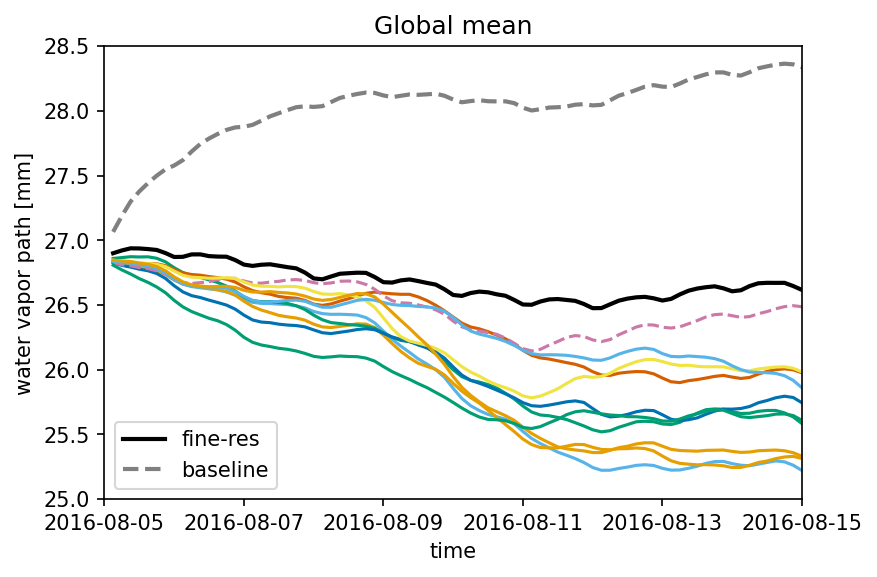

In [7]:
fig, ax = plt.subplots()
for i in range(10):
    linestyle = '--' if i == dashed_seed else '-'
    wvp_global_mean.isel(run=i).plot(ax=ax, linestyle=linestyle);
wvp_global_mean.isel(run=-1).plot(ax=ax, color='k', linewidth=2, label='fine-res');
ds_baseline.water_vapor_path_spatial_mean_global.plot(ax=ax, color='grey', linewidth=2, linestyle='--', label='baseline');
ax.set_title('Global mean')
ax.set_xlim(cftime.datetime(2016, 8, 5), cftime.datetime(2016, 8, 15))
ax.set_xticks([cftime.datetime(2016, 8, d) for d in range(5, 16, 2)])
ax.set_ylim([25, 28.5])
ax.legend()

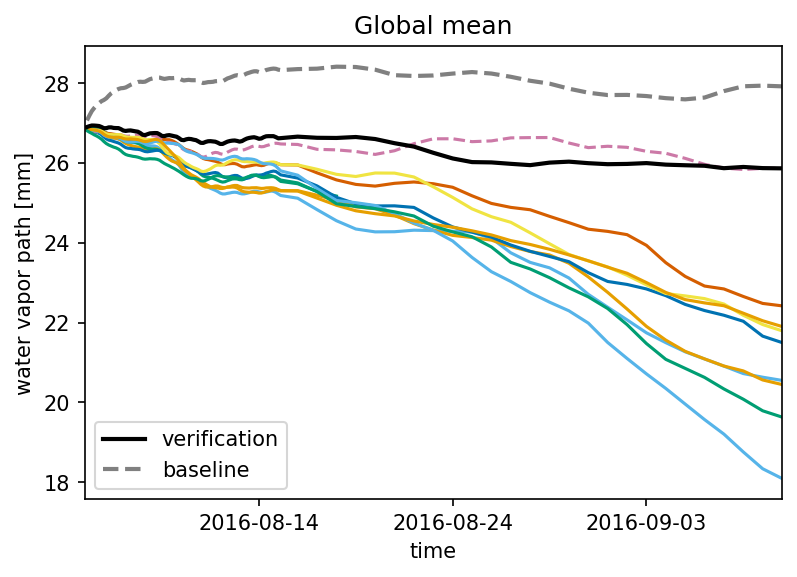

In [8]:
fig, ax = plt.subplots()
for i in range(10):
    linestyle = '--' if i == 5 else '-'
    wvp_global_mean.isel(run=i).plot(ax=ax, linestyle=linestyle);
wvp_global_mean.isel(run=-1).plot(ax=ax, color='k', linewidth=2, label='verification');
ds_baseline.water_vapor_path_spatial_mean_global.plot(ax=ax, color='grey', linewidth=2, linestyle='--', label='baseline');
ax.set_title('Global mean')
ax.set_xlim(cftime.datetime(2016, 8, 5), cftime.datetime(2016, 9, 10))
#ax.set_xticks([cftime.datetime(2016, 8, d) for d in range(5, 16, 2)])
ax.legend()